In [1]:
import json
import time
from base64 import b64decode
from io import BytesIO, StringIO
from IPython import get_ipython
from IPython.core.magic import register_cell_magic
from IPython.utils.capture import capture_output
from IPython.core.interactiveshell import InteractiveShell

from manim import *
scale_res=1
scale_res=4
params = f" -v WARNING -r {170*scale_res},{170*scale_res} -s  --disable_caching Example"
import PIL
cell_counter = 0

@register_cell_magic
def capture_png(line, cell):
    global cell_counter
    cell_counter += 1
    # init capturing cell output
    get_ipython().run_cell_magic(
        'capture',
        ' --no-stderr --no-stdout result',
        cell
    )
    argument_array = line.split('--style')
    post_path = argument_array[0].strip()
    chapter_name_underscore = chapter_name.replace(" ", "_")

    path = f"gallery_assets/{chapter_name_underscore}_{cell_counter:03}_{post_path}"

  #  path = path.split(".png")[0] + str(time.time_ns()) + ".png" time stemps not needed
    if not path:
        raise ValueError('No path found!')

    style = str(*argument_array[1:])
    style = style.strip()
    style = style.strip('"')  # remove quotes

    default_style = ""

    style = default_style + style

    raw_code_block = cell
    code_block = ""

    for codeline in StringIO(raw_code_block):
        if "#NOT" in codeline:
            pass
        else:
            code_block += codeline
    
    new_codeblock = ""
    for codeline in StringIO(code_block):
        if "#ONLY" in codeline:
            codeline= codeline.replace("#ONLY", "") 
            if codeline.startswith("        "): # delete the indention for manim -> TODO this can be made prettier!
                codeline = codeline[8:]

            new_codeblock += codeline
        else:
            pass
    
    if new_codeblock: # checks if there are lines that include "#ONLY"
        code_block = new_codeblock

    code_block = code_block.replace("'", "&#39;") # make sure that javascript can read the single quote character
    code_block = code_block.strip("\n")

    with open(joson_file_path, "r") as jsonFile:
            data = json.load(jsonFile)

    if not chapter_name in data:
        data[chapter_name] = []

    chapter_content = data[chapter_name]
    chapter_content.append(
        {"image_path": path,
        "celltype": "Normal",
        "css": style,
        "code": code_block})

    data[chapter_name] = chapter_content
    with open(joson_file_path, "w") as jsonFile:
        json.dump(data, jsonFile, indent=2, sort_keys=False)

    shell = InteractiveShell.instance()
    # save the output
    with capture_output(stdout=False, stderr=False, display=True) as result:
        shell.run_cell(cell) # idea by @krassowski 

    # save image
    for output in result.outputs:
        display(output)
        data = output.data
        if 'image/png' in data:
            png_bytes = data['image/png']
            if isinstance(png_bytes, str):
                png_bytes = b64decode(png_bytes)
            assert isinstance(png_bytes, bytes)
            bytes_io = BytesIO(png_bytes)
            image = PIL.Image.open(bytes_io)
            image.save(path, 'png')


joson_file_path = "gallery_assets/gallery_parameters.json"
chapter_name = "Plots"

Manim Community v0.16.0.post0

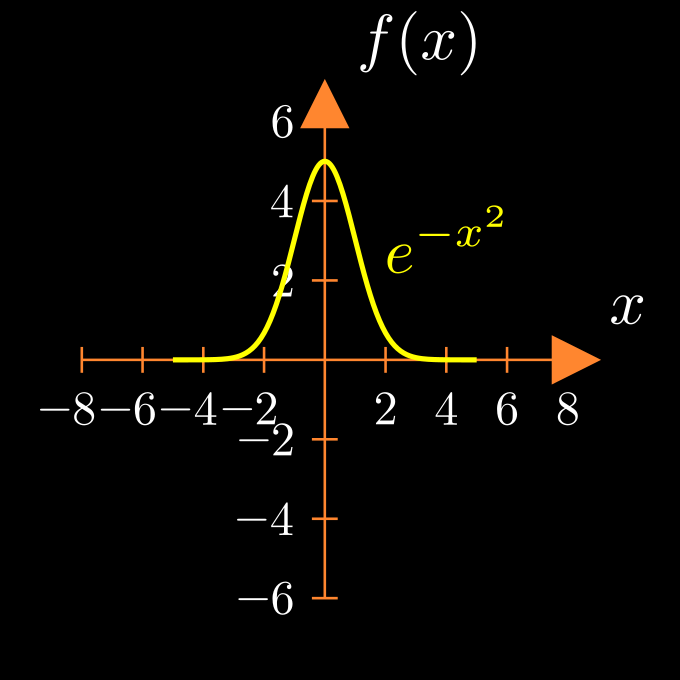

In [2]:
%%capture_png Axes_e_x.png  --style "width: 170px; height: auto;"

%%manim $params
class Example(ZoomedScene):
    def construct(self):
        axes = Axes( #ONLY
            x_range=[-8, 9, 2], #ONLY
            y_range=[-6, 7, 2], #ONLY
            x_length=4, #ONLY
            y_length=4, #ONLY
            axis_config={"include_numbers": True, "numbers_to_exclude": [0]}, #ONLY
            x_axis_config={"color": ORANGE}, #ONLY
            y_axis_config={"color": ORANGE}, #ONLY
        ) #ONLY
        axes_label = axes.get_axis_labels(x_label="x", y_label="f(x)") #ONLY
        graph = axes.plot(lambda x: 5*np.e ** (-x**2/2), x_range=[-5, 5], color=YELLOW) #ONLY
        graph_label = axes.get_graph_label(graph, label="e^{-x^2}", color=YELLOW, x_val=1,dot=False) #ONLY
        self.add(axes, graph, graph_label, axes_label) #ONLY
        self.camera.frame.scale(1/2.7)


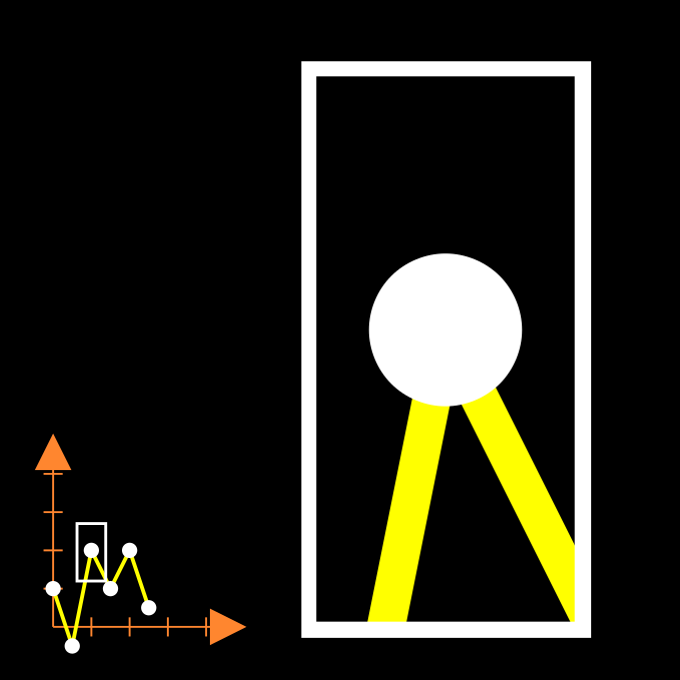

In [3]:
%%capture_png Axes_zoom.png  --style "width: 170px; height: auto;"
%%manim $params
class Example(ZoomedScene):  
    def __init__(self, **kwargs):   #HEREFROM
        ZoomedScene.__init__( 
            self, 
            zoom_factor=0.1, 
            zoomed_display_height=6, 
            zoomed_display_width=3,  
            image_frame_stroke_width=20,  
            zoomed_camera_config={  
                "default_frame_stroke_width": 3,  
            },  
            **kwargs  
        )      
      
    def construct(self):  
        self.activate_zooming(animate=False)  
      
        ax = Axes(  
            x_range=[0, 10, 2],  
            y_range=[0,10, 2],  
            x_length=2,  
            y_length=2,  
            x_axis_config={"color": ORANGE},  
            y_axis_config={"color": ORANGE},  
        )  
        ax.shift(DL)  
        x_vals = [0, 1, 2, 3,4,5]  
        y_vals = [2, -1, 4, 2, 4, 1]  
        graph = ax.plot_line_graph(x_values=x_vals, y_values=y_vals)  
        self.zoomed_camera.frame.move_to(graph.get_top()+0.1*DL)  
        self.zoomed_display.shift(3*LEFT+0.4*UP)  
        self.camera.frame.scale(1/2)  
        self.camera.frame.shift(UR*1)  
        self.add(ax, graph)  #HERETO

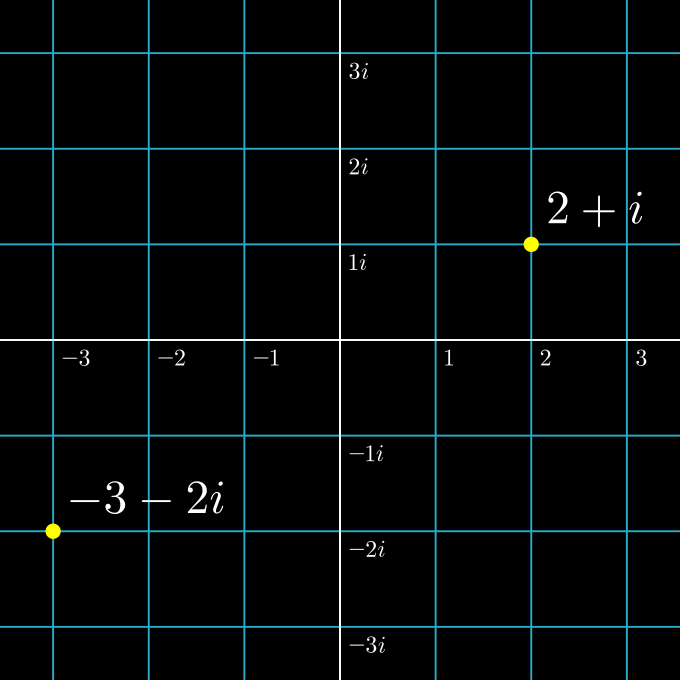

In [4]:
%%capture_png ComplexPlane.png  --style "width: 170px; height: auto;"
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        plane = ComplexPlane().add_coordinates() #ONLY
        d1 = Dot(plane.n2p(2 + 1j), color=YELLOW) #ONLY
        d2 = Dot(plane.n2p(-3 - 2j), color=YELLOW) #ONLY
        label1 = MathTex("2+i").next_to(d1, UR, 0.1) #ONLY
        label2 = MathTex("-3-2i").next_to(d2, UR, 0.1) #ONLY
        self.add(plane, d1,label1,d2,label2) #ONLY
        self.camera.frame.scale(1/2)

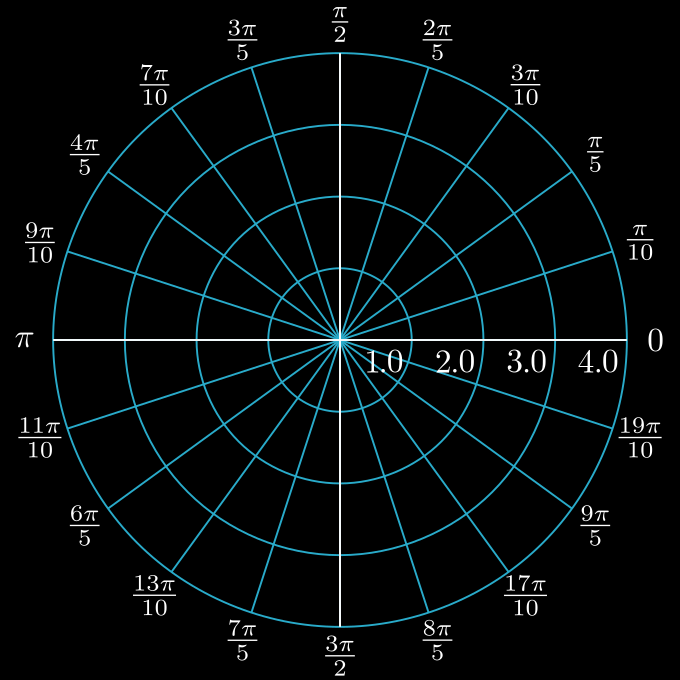

In [5]:
%%capture_png PolarPlane.png  --style "width: 170px; height: auto;"
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        polarplane_pi = PolarPlane( #ONLY
            azimuth_units="PI radians", #ONLY
            size=6, #ONLY
            azimuth_label_font_size=33.6, #ONLY
            radius_config={"font_size": 33.6}, #ONLY
        ).add_coordinates() #ONLY
        self.add(polarplane_pi)
        self.camera.frame.scale(1/2)

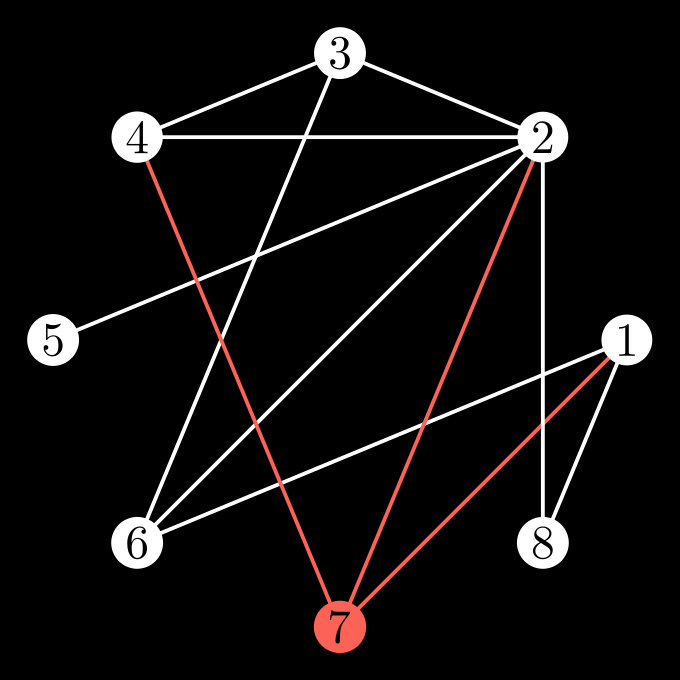

In [6]:
%%capture_png Graph_with_Number.png  --style "width: 170px; height: auto;"
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        vertices = [1, 2, 3, 4, 5, 6, 7, 8]  #ONLY
        edges = [(1, 7), (1, 8), (2, 3), (2, 4), (2, 5),  #ONLY
                 (2, 8), (3, 4), (6, 1), (6, 2),  #ONLY
                 (6, 3), (7, 2), (7, 4)]  #ONLY
        g = Graph(vertices, edges, layout="circular", layout_scale=3,  #ONLY
                  labels=True, vertex_config={7: {"fill_color": RED}},  #ONLY
                  edge_config={(1, 7): {"stroke_color": RED},  #ONLY
                               (2, 7): {"stroke_color": RED},  #ONLY
                               (4, 7): {"stroke_color": RED}})  #ONLY
        self.add(g)
        self.camera.frame.scale(1/2)

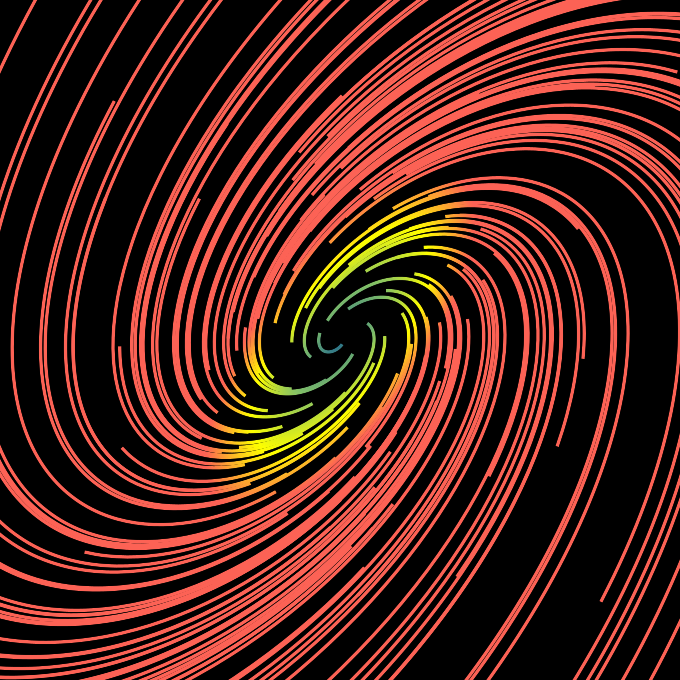

In [7]:
%%capture_png StreamLines.png  --style "width: 170px; height: auto;"
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        func = lambda pos: ((pos[0]*UR+pos[1]*LEFT) - pos)  #ONLY
        mob= StreamLines(func,x_range=[-5,5,1], y_range=[-5,5,1],stroke_width=3)  #ONLY
        self.add(mob)  #ONLY
        self.camera.frame.scale(1/2.5)

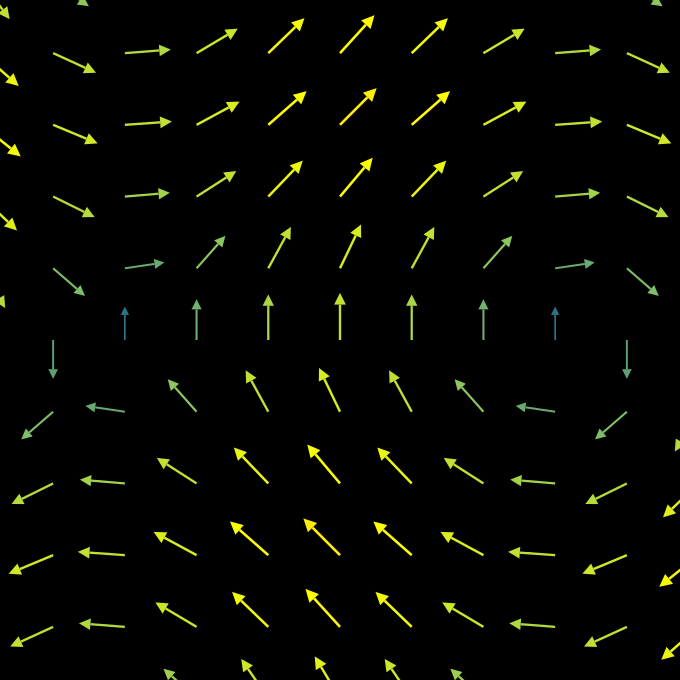

In [8]:
%%capture_png ArrowVectorField.png  --style "width: 170px; height: auto;"
%%manim $params
class Example(ZoomedScene):
    def construct(self):
        func = lambda pos: np.sin(pos[1])*RIGHT+np.cos(pos[0])*UP  #ONLY
        mob = ArrowVectorField(func)  #ONLY
        self.add(mob)
        self.camera.frame.scale(1/3)